In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import os


In [65]:
path = 'Batik1/' # import dataset folder

def load_dataset(path):
    data = []
    labels = []
    names = []
    for sub_folder in os.listdir(path): 
        files = os.listdir(os.path.join(path, sub_folder))
        for i, name in enumerate(files):
            image = cv2.imread(os.path.join(path, sub_folder, name), 0)
            data.append(image)
            labels.append(sub_folder)
            names.append(name)
    return data, labels, names
image, labels, names = load_dataset(path)


Text(0.5, 1.0, 'Megamendung')

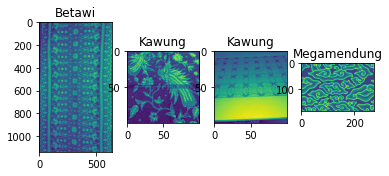

In [67]:

plt.subplot(1,4,1)
plt.imshow(image[1])
plt.title(labels[1])
plt.subplot(1,4,2)
plt.imshow(image[10])
plt.title(labels[20])
plt.subplot(1,4,3)
plt.imshow(image[30])
plt.title(labels[30])
plt.subplot(1,4,4)
plt.imshow(image[40])
plt.title(labels[40])

In [68]:
image = np.array(image)
labels = np.array(labels)
names = np.array(names)

C:\Users\Computer\AppData\Local\Temp\ipykernel_4520\213719442.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  image = np.array(image)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


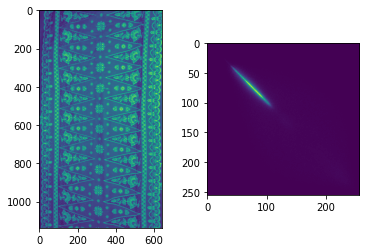

In [24]:
max = np.max(image[1])
imgTmp = np.zeros([max+1,max+1]) 

for i in range (len(image[1])): 
       for j in range(len(image[1][i])-1):
           imgTmp[image[1][i,j],image[1][i,j+1]] +=1
print(imgTmp)
plt.subplot(1,2,1)
plt.imshow(image[1])
plt.subplot(1,2,2)
plt.imshow(imgTmp)


In [59]:
def derajat0 (img): # membuat fungsi derajat berdasarkan soal jurnal
    max = np.max(img) # menampung data image
    imgTmp = np.zeros([max+1,max+1]) #membuat matriks kosong
    for i in range (len(img)): # melakukan perulangan untuk memberikan nilai derat setiap data
        for j in range(len(img[i])-1): # melakukan perulangan untuk memberikan nilai derat setiap data
            imgTmp[img[i,j],img[i,j+1]] +=1
            
    transpos = np.transpose(imgTmp) #mentranspos nilai matriks yang telah didapatkan 
    data = imgTmp+transpos
    
    tmp = 0
    #normalisasi
    for i in range (len(data)): # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
        for j in range(len(data)):  # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
            tmp+=data[i,j]
            
    for i in range(len(data)): # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
        for j in range(len(data)): # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
            data[i,j]/=tmp
    return data

In [60]:
def derajat45 (img):  # membuat fungsi derajat berdasarkan soal jurnal
    max = np.max(img) # menampung data image
    imgTmp=np.zeros([max+1,max+1]) #membuat matriks kosong
    for i in range (len (img)-1):  # melakukan perulangan untuk memberikan nilai derat setiap data
        for j in range (len (img[i])-1): # melakukan perulangan untuk memberikan nilai derat setiap data
            imgTmp[img[i+1,j],img[i,j+1]] += 1
            
    transpos= np.transpose(imgTmp) #mentranspos nilai matriks yang telah didapatkan
    data= imgTmp+transpos
    
    tmp=0
    for i in range (len(data)):  # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
        for j in range (len(data)):  # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
            tmp+=data[i,j]
            
    for i in range (len (data)):  # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
        for j in range (len (data)):  # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
            data[i,j]/=tmp
    return data

In [61]:
def derajat90 (img): # membuat fungsi derajat berdasarkan soal jurnal
    max = np.max(img) # menampung data image
    imgTmp=np.zeros([max+1,max+1]) #membuat matriks kosong
    for i in range (len (img)-1): # melakukan perulangan untuk memberikan nilai derat setiap data
        for j in range (len (img[i])): # melakukan perulangan untuk memberikan nilai derat setiap data
            imgTmp[img[i+1,j],img[i,j]] += 1
            
    transpos= np.transpose(imgTmp) #mentranspos nilai matriks yang telah didapatkan
    data= imgTmp+transpos
    
    tmp=0
    for i in range (len(data)):  # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
        for j in range (len(data)):  # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
            tmp+=data[i,j]
            
    for i in range (len (data)):  # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
        for j in range (len (data)):  # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
            data[i,j]/=tmp
    return data

In [62]:
def derajat135 (img): # membuat fungsi derajat berdasarkan soal jurnal
    max = np.max(img) # menampung data image
    imgTmp=np.zeros([max+1,max+1]) #membuat matriks kosong
    for i in range (len (img)-1):# melakukan perulangan untuk memberikan nilai derat setiap data
        for j in range (len (img[i])-1): # melakukan perulangan untuk memberikan nilai derat setiap data
            imgTmp[img[i,j],img[i+1,j+1]] += 1
            
    transpos= np.transpose(imgTmp) #mentranspos nilai matriks yang telah didapatkan
    data= imgTmp+transpos
    
    tmp=0
    for i in range (len(data)):  # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
        for j in range (len(data)):  # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
            tmp+=data[i,j]
            
    for i in range (len (data)):  # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
        for j in range (len (data)):  # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
            data[i,j]/=tmp
    return data

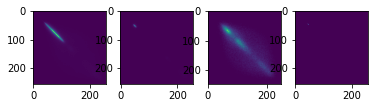

In [69]:
plt.subplot(1,4,1)
plt.imshow(derajat0(image[1]))
plt.subplot(1,4,2)
plt.imshow(derajat45(image[2]))
plt.subplot(1,4,3)
plt.imshow(derajat90(image[3]))
plt.subplot(1,4,4)
plt.imshow(derajat135(image[4]))

In [32]:
def contrast(data): # membuat fungsi fitur contrast
    simpan = 0
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+= data[i,j]+pow(i-j,2)
    return simpan

In [33]:
def dissimilarity(data): # membuat fungsi fitur dissimilarity
    simpan = 0
    for i in range (len(data)): 
        for j in range(len(data)):
            simpan+= data[i,j]+abs(i-j)
    return simpan

In [34]:
def homogenitas(data): # membuat fungsi fitur homogenitas
    simpan = 0 
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+=data[i,j]/(1+abs(i-j))
    return simpan

In [35]:
def entropi(data): # membuat fungsi fitur entropi
    simpan = 0
    for i in range(len(data)):
        for j in range(len(data)):
            if data[i,j] > 0:
                simpan+= -(data[i,j] * math.log(data[i,j]))
    return simpan

In [36]:
def ASM(data): # membuat fungsi fitur ASM
    simpan = 0
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+= pow(data[i,j],2)
    return simpan 

In [37]:
def energy(data): # membuat fungsi fitur energy
    simpan = 0
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+=pow(data[i,j],2)
    return simpan

In [38]:
def correlation(data,mI,mJ,tI,tJ): # membuat fungsi fitur correlation
    simpan = 0
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+=((i-mI)*(j-mJ)*data[i,j])/(tI*tJ)
    return simpan

In [75]:
def meanI(data): # membuat fungsi mean 
    simpan = 0
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+= i * data[i,j]
    return simpan

def meanJ(data): # membuat fungsi mean
    simpan = 0
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+= j * data[i,j]
    return simpan  
def taoI(data,mI): # membuat fungsi tao
    simpan = 0
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+= pow((i-mI),2)*data[i,j]
    simpan = math.sqrt(simpan)
    return simpan
def taoJ(data,mJ): # membuat fungsi tao
    simpan = 0
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+= pow((j-mJ),2)*data[i,j]
    simpan = math.sqrt(simpan)
    return simpan

In [70]:
hasil = []
for i in range(len(image)):
    dat = []
    print(i)
    dat.append(derajat0 (image[i]))
    dat.append(derajat45 (image[i]))
    dat.append(derajat90 (image[i]))
    dat.append(derajat135 (image[i]))
    hasil.append(dat)
   
       

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [76]:
headerPass = ['path','energi0','homogenitas0','entropy0','contras0','dissimilarity0','ASM0','correlation0'
           ,'energi45','homogenitas45','entropy45','contras45','dissimilarity45','ASM45','correlation45'
           ,'energi90','homogenitas90','entropy90','contras90','dissimilarity90','ASM90','correlation90'
           ,'energi135','homogenitas135','entropy135','contras135','dissimilarity135','ASM135','correlation135']


In [77]:
def save_frame(result):
    frame = []
    indeks = 0
    for i in hasil:
        save = []
        save.append(names[indeks])
        indeks+=1
        for j in i:
            en = energy(j)
            save.append(en)
            
            hm = homogenitas(j)
            save.append(hm)
            
            ent = entropi(j)
            save.append(ent)
            
            con = contrast(j)
            save.append(con)

            dis = dissimilarity(j)
            save.append(dis)

            asm = ASM(j)
            save.append(asm)
            mI = meanI(j)
            mJ = meanJ(j)
            tI = taoI(j,mI)
            tJ = taoJ(j,mJ)

            cor = correlation(j,mI,mJ,tI,tJ)
            save.append(cor)
        frame.append(save)
    return frame    

In [78]:
frame = save_frame(hasil)
df = pd.DataFrame(frame, columns=headerPass)

In [79]:
df.head()

,path,energi0,homogenitas0,entropy0,contras0,dissimilarity0,ASM0,correlation0,energi45,homogenitas45,...,dissimilarity90,ASM90,correlation90,energi135,homogenitas135,entropy135,contras135,dissimilarity135,ASM135,correlation135
0,4 (1).jpg,0.005582,0.261484,8.516266,6.721158e+08,5.334253e+06,0.005582,0.886492,0.004519,0.231116,...,5.334253e+06,0.005664,0.893938,0.004609,0.234483,8.674875,6.721158e+08,5.334253e+06,0.004609,0.821408
1,4 (10).jpg,0.000360,0.231927,9.123769,7.158170e+08,5.592321e+06,0.000360,0.802586,0.000294,0.204196,...,5.592321e+06,0.000383,0.789946,0.000294,0.204104,9.307833,7.158170e+08,5.592321e+06,0.000294,0.671440
2,4 (2).jpg,0.002968,0.304225,8.297290,7.158170e+08,5.592321e+06,0.002968,0.880472,0.002477,0.276245,...,5.592321e+06,0.003982,0.889562,0.002560,0.280553,8.457642,7.158170e+08,5.592321e+06,0.002560,0.805133
3,4 (3).jpg,0.000094,0.130539,9.636730,6.304468e+08,5.084249e+06,0.000094,0.794805,0.000076,0.109231,...,5.084249e+06,0.000092,0.783074,0.000077,0.112024,9.803600,6.304468e+08,5.084249e+06,0.000077,0.681530
4,4 (5).jpg,0.024457,0.360395,7.857399,7.158170e+08,5.592321e+06,0.024457,0.397003,0.020127,0.337701,...,5.592321e+06,0.023622,0.378709,0.020130,0.337283,7.985660,7.158170e+08,5.592321e+06,0.020130,0.389797


In [81]:
df.to_csv(r'Batik.csv', index=False)

MAKE MODEL FOR RECOGNITIO

let's make model recognition for batik recognition use CNN and try to get better accuracy from it !!!

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [70]:
directory = 'Batik/'
classes = {'Betawi':0, 'Cendrawasih':1, 'Kawung':2, 'Megamendung':3, 'Parang':4}

In [4]:
augmentasi = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest",
	validation_split=0.2)

In [40]:

train_dataset = augmentasi.flow_from_directory(batch_size=64,
                                                 directory=directory,
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="training",
                                                 class_mode='categorical',
                                                 classes = classes
                                                 )
validation_dataset = augmentasi.flow_from_directory(batch_size=64,
                                                 directory=directory,
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="validation",
                                                 class_mode='categorical',
                                                 classes = classes
                                                 )

Found 419 images belonging to 5 classes.
Found 102 images belonging to 5 classes.


In [47]:
import tensorflow as tf

baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(3, 3))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(5, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [48]:
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

In [49]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
EPOCH = 10
history = model.fit(train_dataset,
        epochs=EPOCH,
        validation_data=validation_dataset, 
        verbose = 1)

Epoch 1/10
7/7 [==============================] - 52s 6s/step - loss: 3.5190 - accuracy: 0.3055 - val_loss: 1.6837 - val_accuracy: 0.3039
Epoch 2/10
7/7 [==============================] - 35s 5s/step - loss: 1.4754 - accuracy: 0.3771 - val_loss: 1.2643 - val_accuracy: 0.5294
Epoch 3/10
7/7 [==============================] - 35s 5s/step - loss: 1.3256 - accuracy: 0.4630 - val_loss: 1.0987 - val_accuracy: 0.5882
Epoch 4/10
7/7 [==============================] - 37s 5s/step - loss: 1.2325 - accuracy: 0.5060 - val_loss: 1.0376 - val_accuracy: 0.6275
Epoch 5/10
7/7 [==============================] - 43s 6s/step - loss: 1.1216 - accuracy: 0.5680 - val_loss: 1.0331 - val_accuracy: 0.6176
Epoch 6/10
7/7 [==============================] - 45s 6s/step - loss: 1.1584 - accuracy: 0.5227 - val_loss: 1.0871 - val_accuracy: 0.6765
Epoch 7/10
7/7 [==============================] - 42s 6s/step - loss: 1.1131 - accuracy: 0.5489 - val_loss: 0.9567 - val_accuracy: 0.6569
Epoch 8/10
7/7 [==================

c:\Users\Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an exp

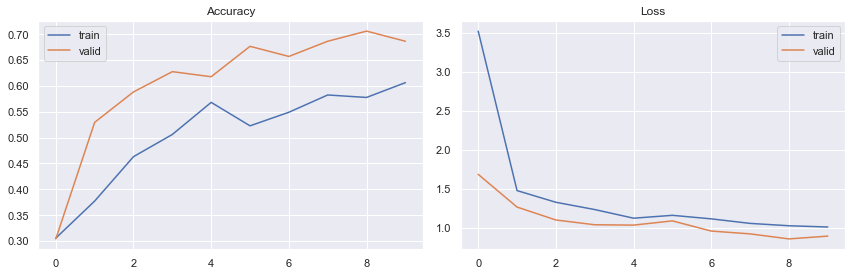

In [52]:
import seaborn as sns

sns.set()
fig = plt.figure(0, (12, 4))

ax = plt.subplot(1, 2, 1)
sns.lineplot(history.epoch, history.history['accuracy'], label='train')
sns.lineplot(history.epoch, history.history['val_accuracy'], label='valid')
plt.title('Accuracy')
plt.tight_layout()

ax = plt.subplot(1, 2, 2)
sns.lineplot(history.epoch, history.history['loss'], label='train')
sns.lineplot(history.epoch, history.history['val_loss'], label='valid')
plt.title('Loss')
plt.tight_layout()

plt.savefig('epoch_history_dcnn.png')
plt.show()

OKAY!!! now we have to improve the acc 

In [53]:
EPOCH = 20
history = model.fit(train_dataset,
        epochs=EPOCH,
        validation_data=validation_dataset, 
        verbose = 1)

Epoch 1/20
7/7 [==============================] - 46s 6s/step - loss: 1.0574 - accuracy: 0.5943 - val_loss: 0.8410 - val_accuracy: 0.7353
Epoch 2/20
7/7 [==============================] - 38s 5s/step - loss: 0.9841 - accuracy: 0.6181 - val_loss: 0.8189 - val_accuracy: 0.6961
Epoch 3/20
7/7 [==============================] - 38s 5s/step - loss: 0.9729 - accuracy: 0.6038 - val_loss: 0.7979 - val_accuracy: 0.7255
Epoch 4/20
7/7 [==============================] - 37s 5s/step - loss: 0.9370 - accuracy: 0.6134 - val_loss: 0.7608 - val_accuracy: 0.7157
Epoch 5/20
7/7 [==============================] - 37s 5s/step - loss: 0.9550 - accuracy: 0.6372 - val_loss: 0.8527 - val_accuracy: 0.7157
Epoch 6/20
7/7 [==============================] - 37s 5s/step - loss: 0.9162 - accuracy: 0.6372 - val_loss: 0.7532 - val_accuracy: 0.7353
Epoch 7/20
7/7 [==============================] - 34s 5s/step - loss: 0.8851 - accuracy: 0.6516 - val_loss: 0.7131 - val_accuracy: 0.7451
Epoch 8/20
7/7 [==================

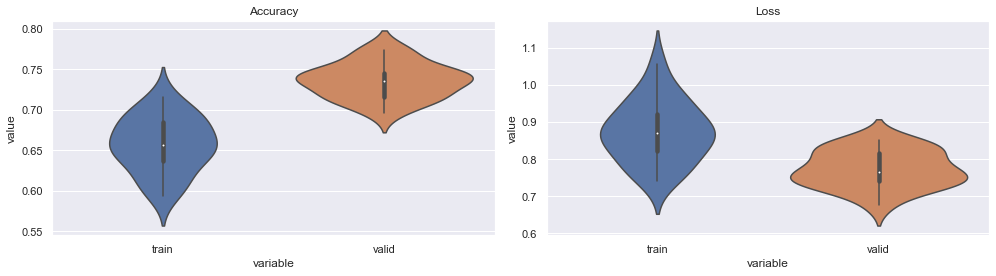

In [55]:
import pandas as pd
df_accu = pd.DataFrame({'train': history.history['accuracy'], 'valid': history.history['val_accuracy']})
df_loss = pd.DataFrame({'train': history.history['loss'], 'valid': history.history['val_loss']})

fig = plt.figure(0, (14, 4))
ax = plt.subplot(1, 2, 1)
sns.violinplot(x="variable", y="value", data=pd.melt(df_accu), showfliers=False)
plt.title('Accuracy')
plt.tight_layout()

ax = plt.subplot(1, 2, 2)
sns.violinplot(x="variable", y="value", data=pd.melt(df_loss), showfliers=False)
plt.title('Loss')
plt.tight_layout()

plt.savefig('performance_dist.png')
plt.show()

In [56]:
train_loss, train_accu = model.evaluate(train_dataset)
test_lost, test_accu = model.evaluate(validation_dataset)
print("final train accuracy = {:.2f}%, validation accuracy = {:.2f}%".format(train_accu*100, test_accu*100))

2/2 [==============================] - 9s 2s/step - loss: 0.6344 - accuracy: 0.7843
final train accuracy = 80.19%, validation accuracy = 78.43%


In [57]:
model.save_weights('80_78.h5')

In [80]:
model.save('80_78_save.h5')

In [67]:
from keras.preprocessing import image
from keras.models import load_model
test_image = image.load_img('Kawung.jpg', target_size=(224, 224))
test_img = image.img_to_array(test_image)
test_img.shape


(224, 224, 3)

In [76]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np
# Parameters
input_size = (224,224) 
#define input shape
channel = (3,)
input_shape = input_size + channel
#define labels
labels = ['Betawi', 'Cendrawasih', 'Kawung', 'Megamendung', 'Parang']

In [77]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr
def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [81]:
from tensorflow.keras.models import load_model
MODEL_PATH = '80_78_save.h5'
model = load_model(MODEL_PATH,compile=False)

Kawung 0.992955


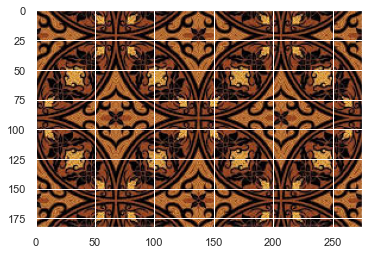

In [82]:
im = Image.open('Kawung.jpg')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)
plt.imshow(im)
print( labels[np.argmax(y)], np.max(y) )

YEY !!!

using MobileNetV2 model Tansfer learning for get the best accuracy.
and i got 80% accuracy with 30 epoch in training.

estimate time : +-5 hours.
and Good Luck For the next project!